In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/dataset/train.csv
/kaggle/input/dataset/test.csv
/kaggle/input/dataset/gender_submission.csv


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
train_data = pd.read_csv('/kaggle/input/dataset/train.csv')
test_data = pd.read_csv('/kaggle/input/dataset/test.csv')
gender_submission = pd.read_csv('/kaggle/input/dataset/gender_submission.csv')

In [5]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
train_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

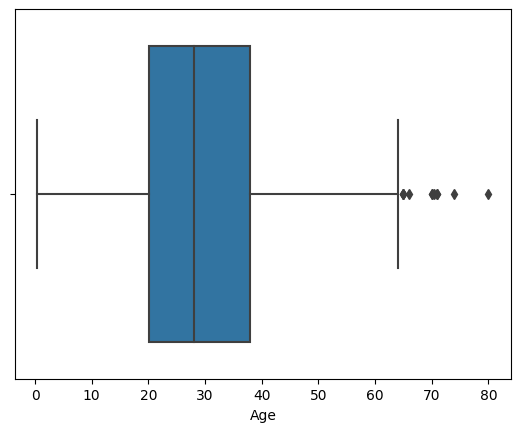

In [10]:
sns.boxplot(x=train_data['Age'])
plt.show()

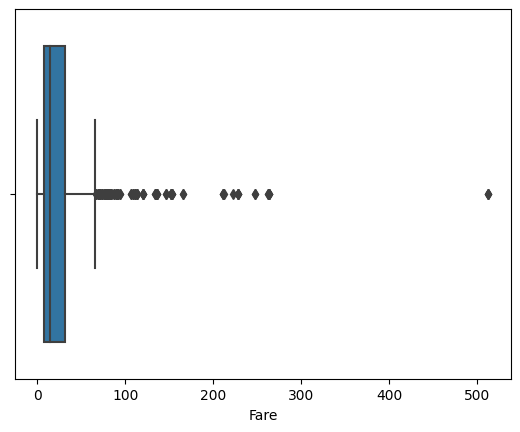

In [11]:
sns.boxplot(x=train_data['Fare'])
plt.show()

In [12]:
# Now replacing the missing value in the age column by the mean of that column
train_data['Age'].fillna(train_data['Age'].mean(),inplace = True)

test_data['Age'].fillna(test_data['Age'].mean(),inplace = True)

/tmp/ipykernel_30/1926329978.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].mean(),inplace = True)
/tmp/ipykernel_30/1926329978.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace

In [13]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Now replacing the Fare column missing value
train_data['Fare'].fillna(train_data['Fare'].mean(),inplace = True)
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace = True)

/tmp/ipykernel_30/4051846233.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Fare'].fillna(train_data['Fare'].mean(),inplace = True)
/tmp/ipykernel_30/4051846233.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [15]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [16]:
# cabin has lot of missing value so removing the column
train_data.drop(columns = ['Cabin'],inplace =True)
test_data.drop(columns = ['Cabin'],inplace = True)

In [17]:
#Embaraked is a categorical variable we will replace the missing value
train_data['Embarked'].fillna(train_data['Age'].mean(),inplace = True)
test_data['Embarked'].fillna(test_data['Age'].mean(),inplace = True)

/tmp/ipykernel_30/3097859784.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Embarked'].fillna(train_data['Age'].mean(),inplace = True)
/tmp/ipykernel_30/3097859784.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, in

In [18]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [19]:
#Identifying outliers based on a z score threshold of 3
outliers=[]
def detect_outliers(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(y)
    return outliers

In [20]:
from scipy import stats
#calculate the z_score fro a column
z_score = stats.zscore(train_data['Age'])
#Identify outliers base on a z_score threshold
outlier_indices = (z_score>3)|(z_score<-3)

In [21]:
cleaned_titanic_df = train_data[~outlier_indices]

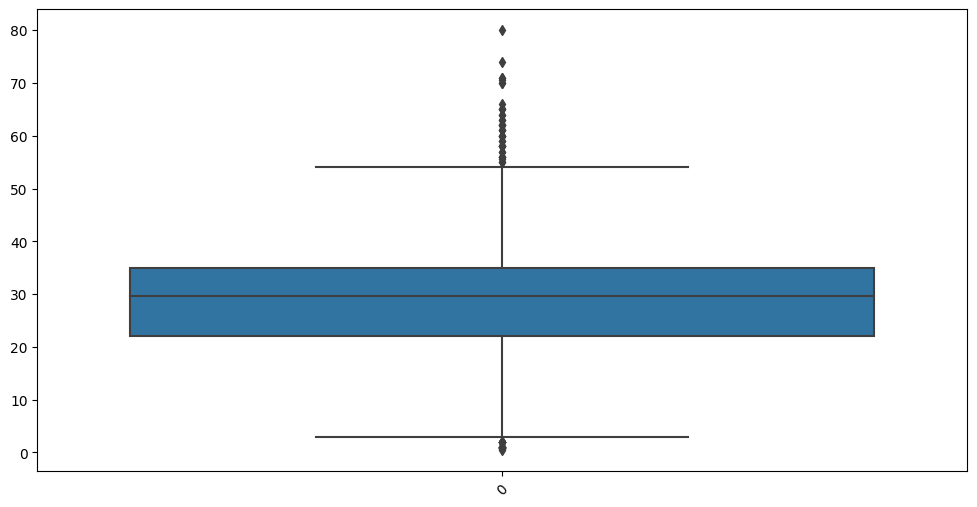

In [22]:
plt.figure(figsize = (12,6))
sns.boxplot(data=train_data['Age'])
plt.xticks(rotation = 45)
plt.show()

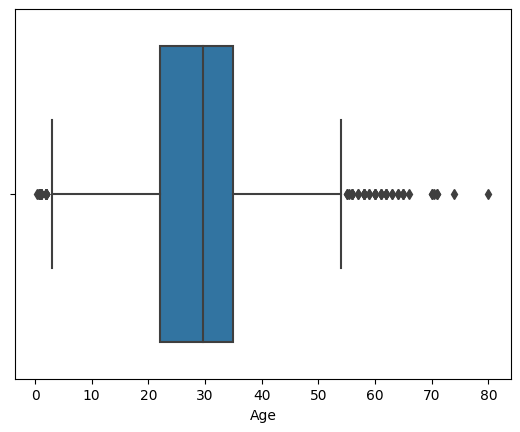

In [23]:
sns.boxplot(x=train_data['Age'])
plt.show()

In [24]:
import pandas as pd

# Load the dataset
train_df = train_data

# Function to calculate summary statistics
def calculate_summary_statistics(df, column):
    stats = {
        'mean': df[column].mean(),
        'median': df[column].median(),
        'mode': df[column].mode()[0],
        'std_dev': df[column].std()
    }
    return stats

# Columns of interest: 'Age', 'Fare', 'SibSp', 'Parch'
columns_of_interest = ['Age', 'Fare', 'SibSp', 'Parch']

# Dictionary to store the statistics for each column
summary_statistics = {col: calculate_summary_statistics(train_df, col) for col in columns_of_interest}

print(summary_statistics)


{'Age': {'mean': 29.69911764705882, 'median': 29.69911764705882, 'mode': 29.69911764705882, 'std_dev': 13.002015226002882}, 'Fare': {'mean': 32.204207968574636, 'median': 14.4542, 'mode': 8.05, 'std_dev': 49.6934285971809}, 'SibSp': {'mean': 0.5230078563411896, 'median': 0.0, 'mode': 0, 'std_dev': 1.1027434322934317}, 'Parch': {'mean': 0.38159371492704824, 'median': 0.0, 'mode': 0, 'std_dev': 0.8060572211299483}}
